# 3.15.x Final Assignment

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a dataset containing information of over 20k Software Professionals with different variables like: 

- the `Rating` of the company given by the employee,
- the `Company Name`, 
- the `Job Title` of the employee, 
- the employee `Salary` (in Indian Rupee ₹), 
- the number of `Salaries Reported`, 
- the `Location` of the company, 
- the `Employment Status` and
- the category of the `Job Roles` 

The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition. 

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type. 

In [3]:
import pandas as pd
sps = pd.read_csv("data/Software Professionals Salary.csv")
sps.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


1. What is the shape (rows, cols) of the `sps` DataFrame? 

In [4]:
print("R: Shape: " + str(sps.shape) + " (" + str(sps.shape[0]) + " rows and " + str(sps.shape[1]) + " columns)")

Shape: (22770, 8) (22770 rows and 8 columns)


2. How many unique `Job Roles` are there in the dataset? 

In [5]:
print("R: There are " + str(sps["Job Roles"].nunique()) + " unique jobs roles.")

There are 11 unique jobs roles.


3. How many unique `Job Title` are there for the "Python" `Job Role`? 

In [30]:
print("R: There are " + str(sps[sps["Job Roles"]=="Python"]["Job Title"].nunique()) + " unique job titles for Python Job Role.")

R: There are 102 unique job titles for Python Job Role.


4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [7]:
print("R: The number of companies that have a python job role with a job title containing the substring Analyst is " + str(sps[ (sps["Job Roles"]=="Python") & (sps["Job Title"].str.contains("Analyst", case=False))]["Company Name"].nunique()) + ".")


The number of companies that have a python job role with a job title containing the substring Analyst is 3.


5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [108]:
company_highest_sp = sps.groupby(by=['Company Name'])[["Salaries Reported"]].count().reset_index()
company_highest_sp = company_highest_sp.iloc[company_highest_sp.idxmax()[1]]["Company Name"]
print("R: The Company which has the highest number of Salaries reported is " + company_highest_sp + ".")

R: The Company which has the highest number of Salaries reported is Tata Consultancy Services.


C:\Users\gonca\AppData\Local\Temp\ipykernel_24308\1697443869.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  company_highest_sp = company_highest_sp.iloc[company_highest_sp.idxmax()[1]]["Company Name"]


6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in? 

In [109]:
print("R: " + company_highest_sp + " is present in " + str(sps[sps["Company Name"]==company_highest_sp]["Location"].nunique()) + " locations.")

R: Tata Consultancy Services is present in 9 locations.


7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [113]:
import requests
url = " https://open.er-api.com/v6/latest/USD"
rates_dict = requests.get(url).json()['rates']
rates_df=pd.DataFrame.from_dict(rates_dict,orient='index',columns=['rate']).reset_index()
INR_cr = rates_df.loc[rates_df['index']=='INR']['rate'].item()
sps['Salary_USD'] = round(sps['Salary'] / INR_cr,0)
sps['Salary_USD'] = sps['Salary_USD'].astype(int)

print('R: The three first entries of sps with the new column Salary in USD:')
print(sps.head(3))
print(' R: At the moment the coversion rate between USD-INR is ' + str(INR_cr))



R: The three first entries of sps with the new column Salary in USD:
   Rating                      Company Name          Job Title   Salary  \
0     3.8                            Sasken  Android Developer   400000   
1     4.5  Advanced Millennium Technologies  Android Developer   400000   
2     4.0                         Unacademy  Android Developer  1000000   

   Salaries Reported   Location Employment Status Job Roles  Salary_USD  
0                  3  Bangalore         Full Time   Android        4817  
1                  3  Bangalore         Full Time   Android        4817  
2                  3  Bangalore         Full Time   Android       12043  
 R: At the moment the coversion rate between USD-INR is 83.034425


8. What is the average `Salary USD` for the "Python" `Job Role`? 

In [50]:
print('R: The average Salary USD for the Python Job Role is ' + str(round(sps[sps['Job Roles']=='Python']['Salary_USD'].mean(),2)))

R: The average Salary USD for the Python Job Role is 5853.29


9. Which `Company Name` has the highest **average** `Salary USD` across all `Job Title`s? 

In [112]:
sps_mean_salary_USD = sps.groupby(by=['Company Name'])[["Salary_USD","Rating"]].mean().reset_index()
sps_mean_salary_USD["Salary_USD"]=sps_mean_salary_USD["Salary_USD"].astype(int)

print("R: The Company which has the highest Salary USD is " + str(sps_mean_salary_USD[sps_mean_salary_USD['Salary_USD']==max(sps_mean_salary_USD['Salary_USD'])]['Company Name'].item()) + ".")

R: The Company which has the highest Salary USD is Thapar University.


10. Create a Plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

R: The company which is causing this oddity is Thapar University


c:\Users\gonca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gonca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gonca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gonca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

[Text(0.5, 1.0, 'Rating // Salary USD'),
 (0.0, 5.1),
 Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Salary [USD]')]

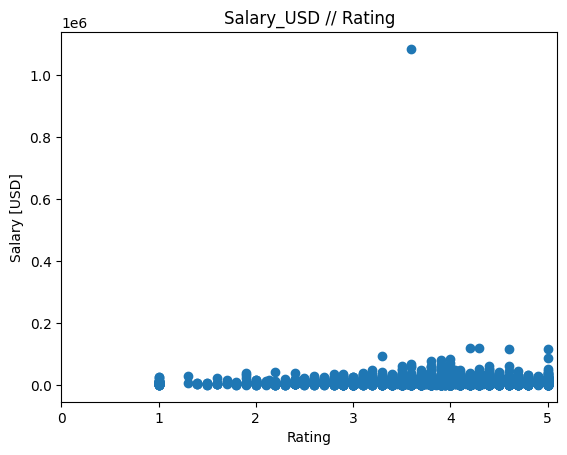

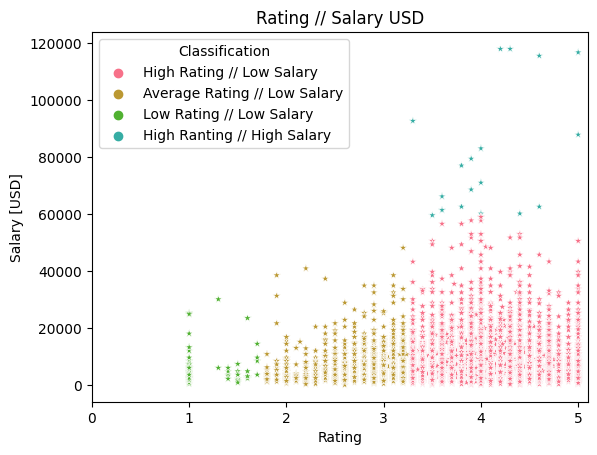

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# In this figure we see the oddity
plt.figure(0)
plt.scatter(sps_mean_salary_USD["Rating"],sps_mean_salary_USD["Salary_USD"])
plt.title("Salary_USD // Rating")
plt.xlabel("Rating")
plt.ylabel("Salary [USD]")
plt.xlim(0,5.1)

# By observing the scatter plot we can see that the oddity is related with some Company which average salary is much more higher then the remaining 
print("R: The company which is causing this oddity is " + str(sps_mean_salary_USD[sps_mean_salary_USD["Salary_USD"]==max(sps_mean_salary_USD["Salary_USD"])]["Company Name"].item()))

# From here, I just clean that odd value and create a new scatter to observed the data classified according the rating/Salary USD
sps_plt=sps_mean_salary_USD[["Rating","Salary_USD"]].copy()
sps_plt=sps_plt[sps_plt["Salary_USD"]<max(sps_plt["Salary_USD"])]

# Create new columns with auxiliar values to help creating a classification of companies for according the relation between the average salary and the the average rating.
sps_plt["Salary-Rate"]= sps_plt["Salary_USD"]/max(sps_plt["Salary_USD"])
sps_plt["Rating-Rate"]= sps_plt["Rating"]/max(sps_plt["Rating"])

# Function used to classify the data and have a clear visualization of the scatter plot
def f(row):
  
    if (row['Rating-Rate'] <= 0.35) & (row['Salary-Rate'] <= 0.50):
        val = "Low Rating // Low Salary"
    elif ((row['Rating-Rate'] > 0.35) & (row['Rating-Rate'] <= 0.65)) & (row['Salary-Rate'] <= 0.50):
        val = "Average Rating // Low Salary"
    elif (row['Rating-Rate'] > 0.65) & (row['Salary-Rate'] <= 0.50):
        val = "High Rating // Low Salary"
    elif (row['Rating-Rate'] <= 0.35)  & (row['Salary-Rate'] > 0.50):
        val = "Low Rating // High Salary"
    elif (row['Rating-Rate'] > 0.35) & (row['Rating-Rate'] <= 0.65) & (row['Salary-Rate'] > 0.50):
        val = "Average Rating // High Salary"
    else:
        val = "High Ranting // High Salary"
    return val

sps_plt["Classification"]=sps_plt.apply(f, axis=1)

plt.figure(1)
sns.scatterplot(x='Rating', y='Salary_USD', hue="Classification", palette=sns.color_palette("husl", 6), marker='*', data=sps_plt).set(title="Rating // Salary USD",xlim=(0,5.1),xlabel="Rating",ylabel="Salary [USD]")
